#**Business Understanding**

**Business Context**

Kehadiran tiket online (*E-ticketing*) tentu saja memudahkan para customer dapat bertransaksi memesan tiket dimanapun dan kapanpun tanpa perlu mendatangi agen tiket/ biro perjalanan. Transformasi digital dalam dunia ticketing membawa dampak besar bagi perjalanan bisnis jual beli tiket. Dimana semula perdagangan tiket hanya dilayani dengan cara mendatangi kantor/agen tiket tertentu, dan saat ini kita cukup hanya dengan menggunakan aplikasi yang ada di handphone, kita sudah dapat melakukan pembelian tiket secara instan. Akan tetapi customer seringkali dihadapkan dengan permasalahan harga tiket yang terus berubah-ubah. Maka dari itu penting sekali bagi para penyedia layanan tersebut untuk memberikan harga tiket yang *affordable* bagi customer.

**Business Problem**

Menghindari kesalahan dalam memperhitungkan harga tiket yang akan menjauhkan perusahaan dari potensi kerugian yang dapat menganggu ekosistem keuangan peusahaan. Oleh karena itu, memetakan harga yang sesuai bagi customer dan mendatangkan keuntungan/profit bagi perusahaan menjadi sebuah prioritas didalam skema bisnis yang dijalankan oleh perusahaan.

**Goals**

Menghadirkan sebuah mekanisme prediksi harga tiket melalui keilmuan Data Science untuk dapat menentukan harga yang bervariasi berdasarkan data-data yang tersedia.

**Analytical Approach**

- Membuat supervised machine learning (ML) yang dapat memprediksi label/target (ticket price) dari fitur-fitur dataset. 
- Menggunakan regression algorithm dalam pemodelan machine learning
- Menggunakan evaluation matrix MAE, MAPE, RMSE, dan R-Squared (R2) untuk melihat performa model ML
- Memilih model ML yang memiliki error paling kecil

##**1) Import Library**

In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 965 kB 61.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [292]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Common library used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Encoder
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

#Preprocessing ML
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score
from sklearn.feature_selection import RFE, SelectPercentile

#sklearn ML algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

#metrics evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


##**2) Load Dataset**

In [295]:
df = pd.read_csv("/content/drive/MyDrive/4.Data Science Course/Personal Project/new/Clean_Dataset.csv")

In [296]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [297]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


##**3) Data Preprocessing**

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [299]:
df.shape

(300153, 12)

In [300]:
df= df.drop(['Unnamed: 0'], axis=1)

In [301]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


###**- Data Cleaning**

In [302]:
# check info feature and target
cols_item = []
for col in df.columns :
    cols_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique()]);

df_info = pd.DataFrame(columns=['features', 'data_type', 'missing_value', 'missing_value_Pct', 'unique_value'],
                     data=cols_item)
df_info

,features,data_type,missing_value,missing_value_Pct,unique_value
0,airline,object,0,0.0,6
1,flight,object,0,0.0,1561
2,source_city,object,0,0.0,6
3,departure_time,object,0,0.0,6
4,stops,object,0,0.0,3
5,arrival_time,object,0,0.0,6
6,destination_city,object,0,0.0,6
7,class,object,0,0.0,2
8,duration,float64,0,0.0,476
9,days_left,int64,0,0.0,49


In [303]:
# check data with missing value (NaN/Null)
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [304]:
# check duplicated data
df.duplicated().sum()

0

>**Observasi:**
> - Terlihat bahwa tidak ada missing value pada dataset
> - Tidak ada data yang terduplikat


###**- Rename Columns**

In [305]:
# select column to rename
df = df.rename(columns = {'flight':'flight_number', 'class':'flight_class','duration':'flight_duration'})

In [306]:
df = df[['airline','flight_number','flight_class','source_city','destination_city','departure_time',
          'arrival_time','flight_duration','stops','days_left','price']]

In [307]:
df.head()

,airline,flight_number,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,price
0,SpiceJet,SG-8709,Economy,Delhi,Mumbai,Evening,Night,2.17,zero,1,5953
1,SpiceJet,SG-8157,Economy,Delhi,Mumbai,Early_Morning,Morning,2.33,zero,1,5953
2,AirAsia,I5-764,Economy,Delhi,Mumbai,Early_Morning,Early_Morning,2.17,zero,1,5956
3,Vistara,UK-995,Economy,Delhi,Mumbai,Morning,Afternoon,2.25,zero,1,5955
4,Vistara,UK-963,Economy,Delhi,Mumbai,Morning,Morning,2.33,zero,1,5955


###**- Target/Label Inspection**

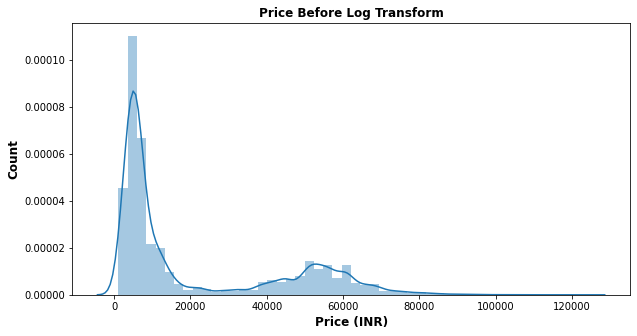

In [308]:
# check the distribution of price 
plt.figure(figsize=(10, 5));
sns.distplot(df['price']);
plt.title('Price Before Log Transform', weight = 'bold', fontsize= 12);
plt.ylabel('Count', weight = 'bold', fontsize = 12);
plt.xlabel('Price (INR)', weight = 'bold', fontsize= 12);

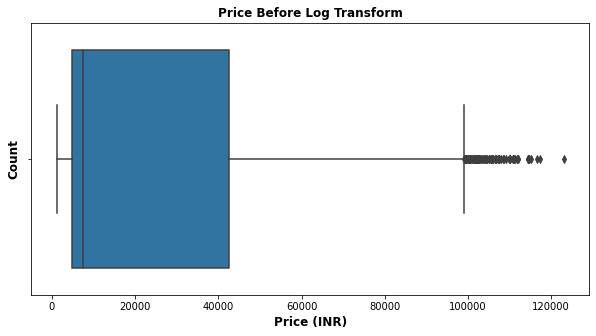

In [309]:
# check the outliers of price 
plt.figure(figsize=(10, 5));
sns.boxplot(df['price']);
plt.title('Price Before Log Transform', weight = 'bold', fontsize= 12);
plt.ylabel('Count', weight = 'bold', fontsize = 12);
plt.xlabel('Price (INR)', weight = 'bold', fontsize= 12);

In [310]:
# add new column to transform target/label with log transform
df['log_price'] = np.log1p(df['price'])

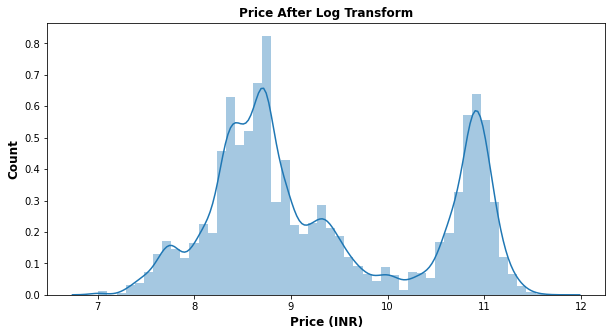

In [311]:
# check again the distribution of price after log transform
plt.figure(figsize=(10, 5));
sns.distplot(df['log_price']);
plt.title('Price After Log Transform', weight = 'bold', fontsize= 12);
plt.ylabel('Count', weight = 'bold', fontsize = 12);
plt.xlabel('Price (INR)', weight = 'bold', fontsize= 12);

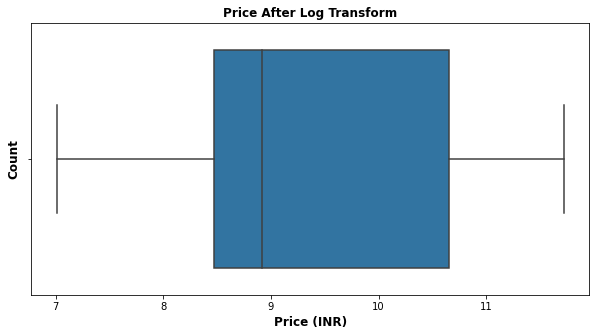

In [312]:
# check again the outliers of price after log transform
plt.figure(figsize=(10, 5));
sns.boxplot(df['log_price']);
plt.title('Price After Log Transform', weight = 'bold', fontsize= 12);
plt.ylabel('Count', weight = 'bold', fontsize = 12);
plt.xlabel('Price (INR)', weight = 'bold', fontsize= 12);

##**4) Exploratory Data Analysis (EDA)**

In [21]:
# list categorical column
cats_col = [col for col in df.columns if df[col].dtype == 'object']

# list numerical column
nums_col = [col for col in df.columns if df[col].dtype != 'object']

In [22]:
# check categorical column
cats_col

['airline',
 'flight_number',
 'flight_class',
 'source_city',
 'destination_city',
 'departure_time',
 'arrival_time',
 'stops']

In [23]:
# check numerical column
nums_col

['flight_duration', 'days_left', 'price', 'log_price']

###**a) Statistical Summary**

In [24]:
df[cats_col].describe().T

,count,unique,top,freq
airline,300153,6,Vistara,127859
flight_number,300153,1561,UK-706,3235
flight_class,300153,2,Economy,206666
source_city,300153,6,Delhi,61343
destination_city,300153,6,Mumbai,59097
departure_time,300153,6,Morning,71146
arrival_time,300153,6,Night,91538
stops,300153,3,one,250863


In [25]:
df[nums_col].describe().T

,count,mean,std,min,25%,50%,75%,max
flight_duration,300153.0,12.221021,7.191997,0.830000,6.830000,11.250000,16.170000,49.830000
days_left,300153.0,26.004751,13.561004,1.000000,15.000000,26.000000,38.000000,49.000000
price,300153.0,20889.660523,22697.767366,1105.000000,4783.000000,7425.000000,42521.000000,123071.000000
log_price,300153.0,9.330747,1.112675,7.008505,8.473032,8.912743,10.657777,11.720525


###**b) Univariate Analysis**

####**- Categorical Feature**

#####**- Airline**

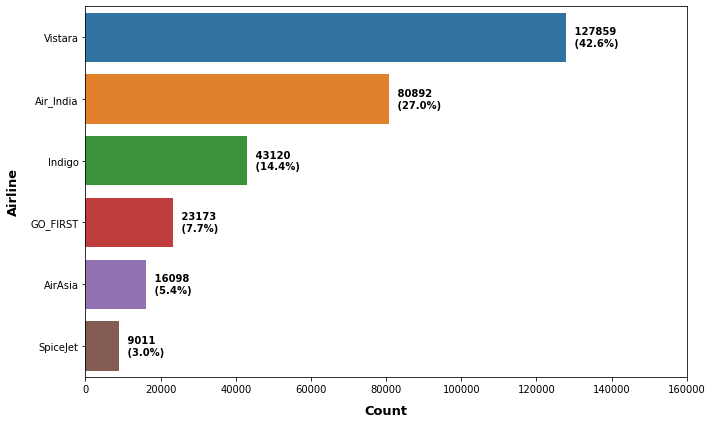

In [26]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='airline', order= df['airline'].value_counts().index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,160000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Airline', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik diatas, nampak bahwa airline dengan jumlah penerbangan **terbanyak** didominasi oleh **Vistara** airline.
> - **Spice jet** merupakan airline dengan jumlah penerbangan **paling sedikit**

#####**- Flight Number**

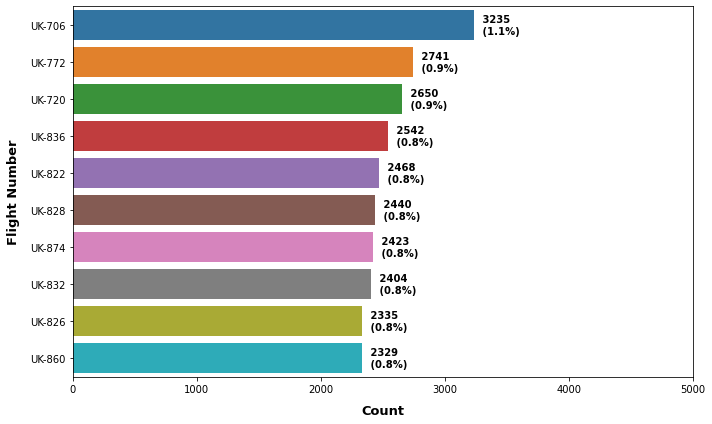

In [27]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='flight_number', order= df['flight_number'].value_counts().head(10).index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,5000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Flight Number', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik top 10 flight number diatas, pesawat dengan flight number **UK-706** merupakan armada yang memiliki jumlah penerbangan **paling banyak** (3235 jumlah penerbangan).
> - Secara umum, dari top 10 armada ini, menunjukan bahwa jumlah penerbangan diatas **2000-an**.

#####**- Departure Time**

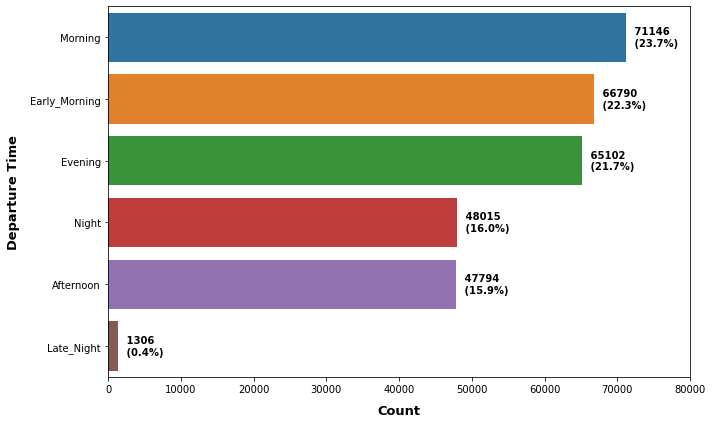

In [28]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='departure_time',order= df['departure_time'].value_counts().index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,80000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Departure Time', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik diatas, waktu/jam keberangkatan penerbangan **paling banyak** ada di waktu **pagi hari (08:00 - 11.00 am)** (71146 jumlah penerbangan).
> - Waktu/jam keberangkatan penerbangan **paling sedikit** ada di waktu **larut malam (00:00 - 00:04 am)** (1306 jumlah penerbangan).

#####**- Arrival Time**

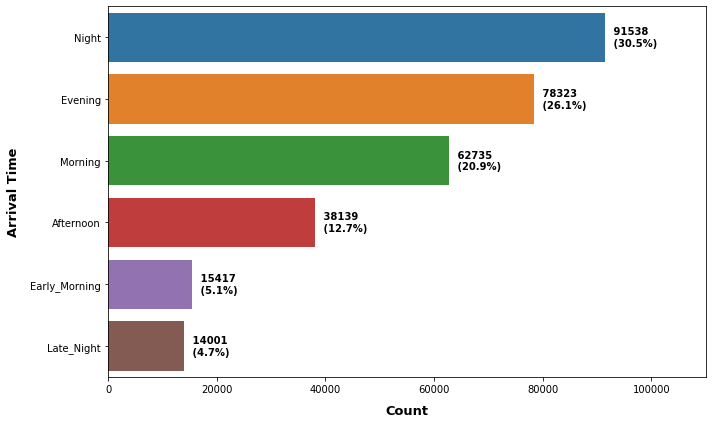

In [29]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='arrival_time',order= df['arrival_time'].value_counts().index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,110000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Arrival Time', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik diatas, waktu/jam kedatangan penerbangan **paling banyak** ada di waktu **malam hari (07:00 - 11.00 pm)** (91538 jumlah penerbangan).
> - Waktu/jam kedatangan penerbangan **paling sedikit** ada di waktu **larut malam (00:00 - 00:04 am)** (14001 jumlah penerbangan).

#####**- Stops/Transit**

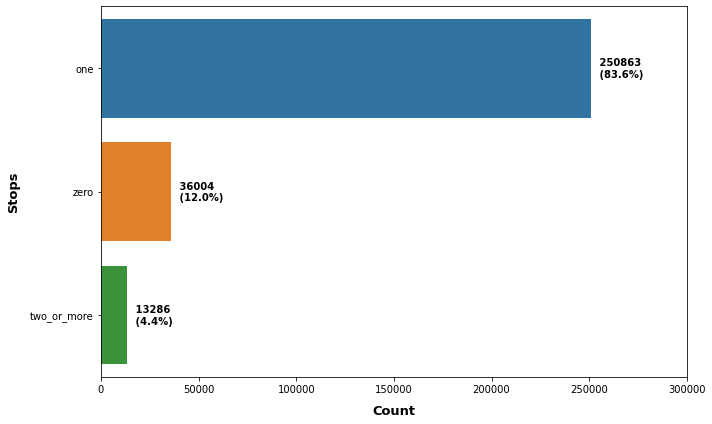

In [30]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='stops',order= df['stops'].value_counts().index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,300000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Stops', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik diatas, jumlah pemberhentian/transit penerbangan **paling banyak** yaitu **1 x transit (one stops)** (250863 jumlah penerbangan).
> - Jumlah pemberhentian/transit penerbangan **paling sedikit** yaitu **>=2  transit (two or more stops)** (13286 jumlah penerbangan).

#####**- Source/Origin City**

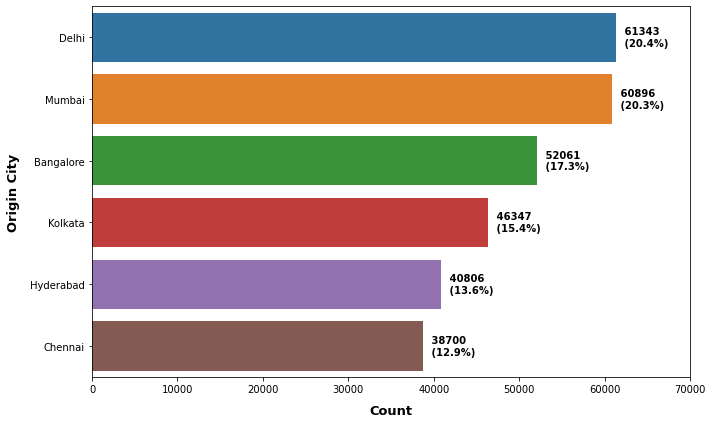

In [31]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='source_city',order= df['source_city'].value_counts().index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,70000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Origin City', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik diatas, kota asal keberangkatan penerbangan **paling banyak** yaitu **Delhi** (61343 jumlah penerbangan).
> - Kota asal keberangkatan penerbangan **paling sedikit** yaitu **Chennai** (38700 jumlah penerbangan).

#####**- Destination City**

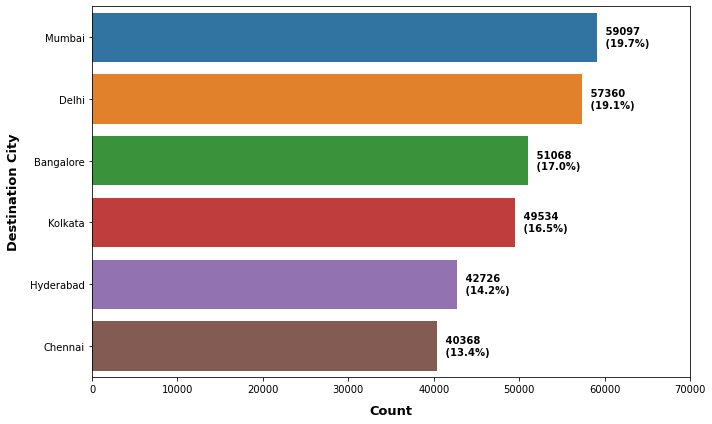

In [32]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='destination_city',order= df['destination_city'].value_counts().index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,70000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Destination City', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik diatas, kota tujuan keberangkatan penerbangan **paling banyak** yaitu **Mumbai** (59097 jumlah penerbangan).
> - Kota tujuan keberangkatan penerbangan **paling sedikit** yaitu **Chennai** (40368 jumlah penerbangan).

#####**- Flight Classes**

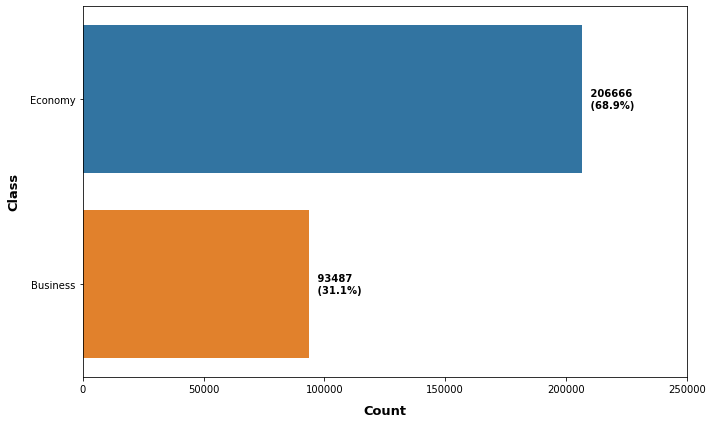

In [33]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df, y='flight_class',order= df['flight_class'].value_counts().index)
labels = [f' {v.get_width()} \n ({ v.get_width()/df.stops.count()*100:0.1f}%)' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_xlim(0,250000)
ax.set_xlabel('Count', fontsize= 13, weight='bold', labelpad=10)
ax.set_ylabel('Class', fontsize= 13, weight='bold', labelpad=10)
plt.tight_layout()
plt.show()

> **Observasi:**
> - Berdasarkan grafik diatas, kelas penerbangan **paling banyak** yaitu **Economy Class** (206666 jumlah penerbangan).
> - Kelas penerbangan **paling sedikit** yaitu **Business Class** (93487 jumlah penerbangan).

####**- Numerical Feature**

#####**- Duration, Days Left, and Price**

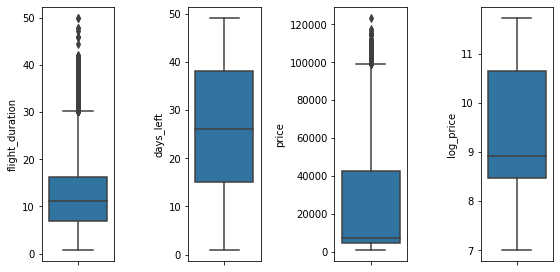

In [34]:
plt.figure(figsize=(8,4))
for i in range(0,len(nums_col)):
   plt.subplot(1,4,i+1)
   sns.boxplot(y=nums_col[i],data=df)
   plt.tight_layout(pad=1.5)

> **Observasi:**
> - Berdasarkan grafik diatas, kolom **duration** dan **price** terdapat outliers. artinya tedapat persebaran data/nilai yang tidak terdistribusi secara normal (lebih dari Q3 + 1.5 x IQR).

###**c) Multivariate Analysis**

#####**Business Question 1**
Airline dengan class dan jam keberangkatan apa yang memiliki pendapatan terbesar?

In [35]:
airline_income = df.groupby(['airline','flight_class','departure_time']).agg({'price': [('total_revenue','sum')]})
airline_income.columns = airline_income.columns.droplevel()
airline_income = airline_income.sort_values('total_revenue', ascending=False)
airline_income.reset_index(inplace=True)
airline_income

,airline,flight_class,departure_time,total_revenue
0,Vistara,Business,Morning,886816151
1,Vistara,Business,Evening,744450870
2,Vistara,Business,Early_Morning,677145782
3,Vistara,Business,Night,622912371
4,Vistara,Business,Afternoon,429972462
5,Air_India,Business,Early_Morning,377123711
6,Air_India,Business,Evening,356628646
7,Air_India,Business,Morning,304568259
8,Air_India,Business,Night,294905062
9,Air_India,Business,Afternoon,210740118


> **Observasi:**
> - **Vistara** menjadi airline dengan pendapatan **paling tinggi** dari penjualan tiket **business class** dengan jam keberangkatan **pagi hari** (total penjualan harga tiket= ₹886.816.151 rupee)
> - Sedangkan **Air Asia** menjadi airline dengan pendapatan **paling rendah** dari penjualan tiket **economy class** dengan jam keberangkatan **larut malam** (total penjualan harga tiket= ₹598.187 rupee)

#####**Business Question 2**
Airline dengan class dan jam keberangkatan apa yang memiliki harga termahal dan termurah?

In [36]:
price_max = df.groupby(['airline','flight_class','departure_time']).agg({'price': [('max_price','max')]})
price_max.columns = price_max.columns.droplevel()
price_max = price_max.sort_values('max_price', ascending=False)
price_max.reset_index(inplace=True)
price_max

,airline,flight_class,departure_time,max_price
0,Vistara,Business,Morning,123071
1,Vistara,Business,Early_Morning,117307
2,Vistara,Business,Evening,116562
3,Vistara,Business,Night,115211
4,Vistara,Business,Afternoon,111437
5,Air_India,Business,Night,90970
6,Air_India,Business,Evening,89257
7,Air_India,Business,Morning,80756
8,Air_India,Business,Early_Morning,79954
9,Air_India,Business,Afternoon,77790


In [37]:
price_min = df.groupby(['airline','flight_class','departure_time']).agg({'price': [('min_price','min')]})
price_min.columns = price_min.columns.droplevel()
price_min = price_min.sort_values('min_price', ascending=True)
price_min.reset_index(inplace=True)
price_min

,airline,flight_class,departure_time,min_price
0,AirAsia,Economy,Morning,1105
1,Indigo,Economy,Night,1105
2,Indigo,Economy,Morning,1105
3,Indigo,Economy,Evening,1105
4,Indigo,Economy,Early_Morning,1105
5,Indigo,Economy,Afternoon,1105
6,GO_FIRST,Economy,Evening,1105
7,GO_FIRST,Economy,Afternoon,1105
8,SpiceJet,Economy,Early_Morning,1106
9,AirAsia,Economy,Afternoon,1443


> **Observasi:**
> - Tiket maskapai **Vistara** dengan kelas penerbangan **business class** dan jadwal keberangkatan penerbangan **pagi hari/morning** merupakan tiket penerbangan dengan **harga termahal** (₹123.071 rupee)
> - Tiket maskapai **Vistara** dengan kelas **business class**, terlihat bahwa **disemua waktu/jam keberangkatan** rata-rata memiliki harga tiket berkisar **₹117.000-an**
> - Maskapai **Vistara** tidak menjual tiket untuk waktu/jam keberangkatan penerbangan **larut malam/late night** disemua kelas penerbangan.
> - Tiket kelas **business class** termurah maskapai **Vistara** di semua waktu/jam keberangkatan penerbangan berkisar **₹17.000-an rupee**
> - Tiket maskapai **Indigo** dengan kelas **economy class**, terlihat disemua waktu/jam keberangkatan penerbangan (kecuali late night = ₹2.050 rupee) menjadi yang **termurah** (rata-rata berkisar ₹1.105 rupee)


#####**Business Question 3**
Destinasi dengan class penerbangan dan jam penerbangan apa yang memiliki harga tiket termahal dan termurah?

In [38]:
destination_max = df.groupby(['destination_city','flight_class','departure_time']).agg({'price': [('max_price','max')]})
destination_max.columns = destination_max.columns.droplevel()
destination_max = destination_max.sort_values('max_price', ascending=False)
destination_max.reset_index(inplace=True)
destination_max

,destination_city,flight_class,departure_time,max_price
0,Delhi,Business,Morning,123071
1,Kolkata,Business,Early_Morning,117307
2,Kolkata,Business,Evening,116562
3,Mumbai,Business,Night,115211
4,Hyderabad,Business,Morning,114705
...,...,...,...,...
66,Mumbai,Economy,Late_Night,14419
67,Delhi,Economy,Late_Night,14314
68,Hyderabad,Economy,Late_Night,12947
69,Chennai,Economy,Late_Night,12844


In [39]:
destination_min = df.groupby(['destination_city','flight_class','departure_time']).agg({'price': [('min_price','min')]}).tail(60)
destination_min.columns = destination_min.columns.droplevel()
destination_min = destination_min.sort_values('min_price', ascending=False)
destination_min.reset_index(inplace=True)
destination_min

,destination_city,flight_class,departure_time,min_price
0,Mumbai,Business,Late_Night,56058
1,Delhi,Business,Late_Night,52586
2,Chennai,Business,Late_Night,44682
3,Hyderabad,Business,Late_Night,44432
4,Kolkata,Business,Night,27976
5,Kolkata,Business,Evening,27976
6,Kolkata,Business,Late_Night,25000
7,Hyderabad,Business,Afternoon,24056
8,Chennai,Business,Early_Morning,23484
9,Delhi,Business,Night,22140


> **Observasi:**
> - Tiket penerbangan **business class** dengan waktu/jam keberangkatan penerbangan **pagi hari/morning** menuju kota **delhi** menjadi yang **termahal** (₹123.071 rupee)
> - Tiket penerbangan **economy class** dengan waktu/jam keberangkatan penerbangan **apapun** (kecuali late night = ₹3.401 rupee) menuju **hyderabad** menjadi yang **termurah** (₹1.105 rupee)


#####**Business Question 4**
Rata-rata harga tiket penerbangan business class dan economy class?

In [40]:
avg_class = df.groupby(['flight_class']).agg({'price': [('avg_price','mean')]})
avg_class.columns = avg_class.columns.droplevel()
avg_class = avg_class.sort_values('avg_price', ascending=False)
avg_class.reset_index(inplace=True)
avg_class 

,flight_class,avg_price
0,Business,52540.081124
1,Economy,6572.342383


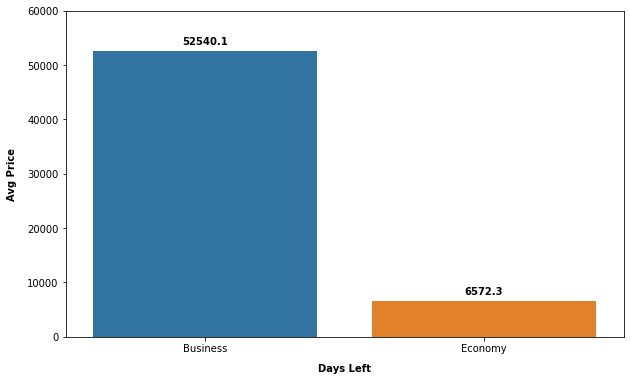

In [41]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=avg_class, 
                 x='flight_class',
                 y='avg_price')
labels = [f'{v.get_height():0.1f}' for i, v in enumerate(ax.containers[0])]
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=5)
ax.set_ylim(0,60000)
ax.set_xlabel('Days Left', weight='bold', labelpad=10)
ax.set_ylabel('Avg Price', weight='bold', labelpad=10)
plt.show()

> **Observasi:**
> - Rata-rata harga tiket **business class** jauh lebih mahal ketimbang harga tiket **economy class**.
> - Selisih harga tiket **business class** yaitu 9 kali lipat lebih mahal dari harga tiket **economy class**.



#####**Business Question 5**
Bagaimana rata-rata harga tiket dari business class dan economy class yang semakin mendekati jadwal penerbangan?

In [42]:
price_dayleft = df.groupby(['days_left','flight_class']).agg({'price': [('avg_price', 'mean')]})
price_dayleft.columns = price_dayleft.columns.droplevel()
price_dayleft = price_dayleft.sort_values('avg_price', ascending=False)
price_dayleft.reset_index(inplace=True)
price_dayleft

,days_left,flight_class,avg_price
0,1,Business,65169.312030
1,2,Business,60455.848506
2,3,Business,60313.822331
3,5,Business,56149.915397
4,4,Business,56120.287087
...,...,...,...
93,49,Economy,4750.805113
94,40,Economy,4739.729790
95,48,Economy,4717.688994
96,46,Economy,4704.503549


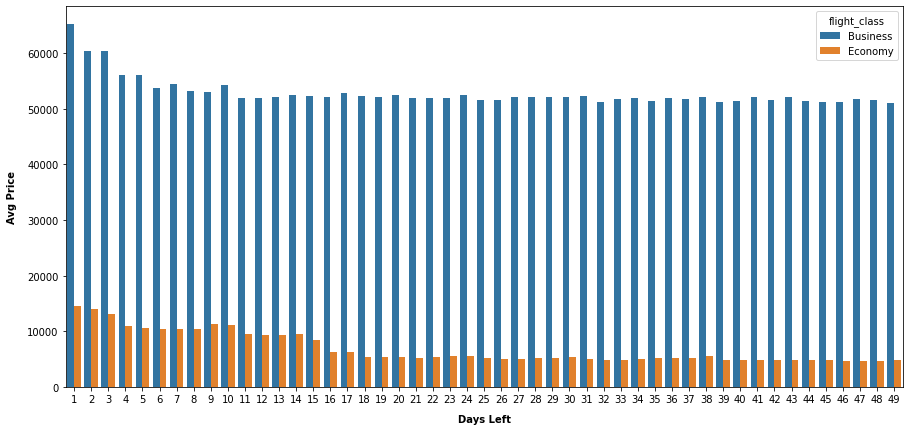

In [43]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=price_dayleft, 
                 x='days_left',
                 y='avg_price', 
                 hue= 'flight_class',
                 order= df['days_left'].sort_values(ascending=True).unique())
ax.set_xlabel('Days Left', weight='bold', labelpad=10)
ax.set_ylabel('Avg Price', weight='bold', labelpad=10)
plt.show()

> **Observasi:**
> - Dilihat dari grafik, terlihat bahwa rata-rata harga tiket kelas **economy class** yang semakin mendekati hari keberangkatan penerbangan yaitu **<=15 hari**, **kenaikan** harga tiket semakin **signifikan**, sedangkan diatas 15 hari harga tiket cenderung flat/stabil (>=15 hari = ±₹6000 rupee,  <=15 hari = >₹6000 - ₹15000 rupee).
> - Sedangkan rata-rata harga tiket kelas **business class** yang semakin mendekati hari keberangkatan penerbangan yaitu **<=10 hari**, **kenaikan** harga tiket semakin **signifikan**, sedangkan diatas 10 hari harga tiket cenderung **flat/stabil** (>=10 hari = ±₹52000 rupee, <=15 hari = >₹52000 - ₹65000 rupee).

#####**Business Question 6**
Bagaimana rata-rata harga tiket dari business class dan economy class yang semakin lama durasi penerbangannya?

In [44]:
price_duration = df.groupby(['flight_duration','flight_class']).agg({'price': [('avg_price', 'mean')]})
price_duration.columns = price_duration.columns.droplevel()
price_duration= price_duration.sort_values('avg_price', ascending=False)
price_duration.reset_index(inplace=True)
price_duration

,flight_duration,flight_class,avg_price
0,36.08,Business,72338.000000
1,35.08,Business,70094.450000
2,34.00,Business,68963.000000
3,37.83,Business,68963.000000
4,32.00,Business,67436.920000
...,...,...,...
844,1.25,Economy,2465.631440
845,1.17,Economy,2464.453968
846,1.00,Economy,2213.786667
847,0.92,Economy,2003.538462


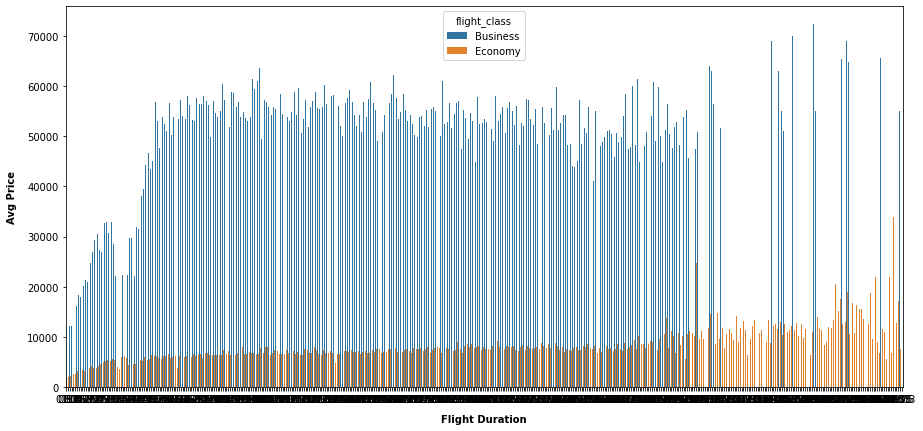

In [45]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=price_duration, 
                 x='flight_duration',
                 y='avg_price', 
                 hue= 'flight_class',
                 order= df['flight_duration'].sort_values(ascending=True).unique())
ax.set_xlabel('Flight Duration', weight='bold', labelpad=10)
ax.set_ylabel('Avg Price', weight='bold', labelpad=10)
plt.show()

> **Observasi:**
> - Dilihat dari grafik, terlihat bahwa rata-rata harga tiket kelas **economy class** menunjukan adanya **kenaikan** harga tiket sejalan dengan semakin **lamanya durasi/ waktu jarak tempuh** penerbangan menuju destinasi
> - Sedangkan rata-rata harga tiket pada kelas **business class** menunjukan harga yang **bervariasi** sejalan dengan semakin **lamanya durasi/waktu jarak tempuh** penerbangan menuju destinasi

#####**Business Question 7**
Bagaimana rata-rata harga tiket dari business class dan economy class dari jumlah pemberhentian/transit penerbangan?

In [46]:
price_stops = df.groupby(['stops','flight_class']).agg({'price': [('avg_price', 'mean')]})
price_stops.columns = price_stops.columns.droplevel()
price_stops = price_stops.sort_values('avg_price', ascending=False)
price_stops.reset_index(inplace=True)
price_stops

,stops,flight_class,avg_price
0,two_or_more,Business,70127.660203
1,one,Business,54687.377156
2,zero,Business,27846.339052
3,two_or_more,Economy,9142.264279
4,one,Economy,6812.857800
5,zero,Economy,4012.624615


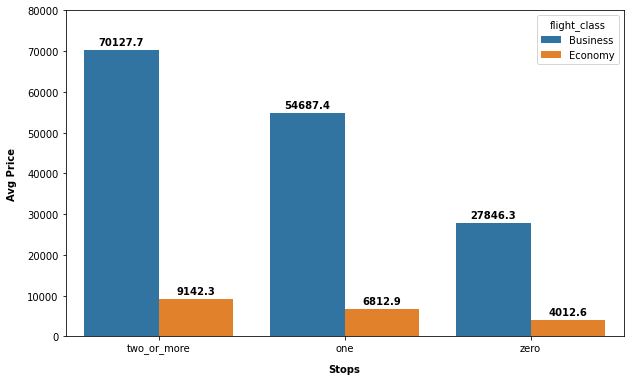

In [47]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=price_stops, 
                 x='stops',
                 y='avg_price', 
                 hue= 'flight_class')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f', weight='bold', padding= 3)
ax.set_ylim(0,80000)
ax.set_xlabel('Stops', weight='bold', labelpad=10)
ax.set_ylabel('Avg Price', weight='bold', labelpad=10)
plt.show()

> **Observasi:**
> - Dilihat dari grafik, terlihat bahwa rata-rata harga tiket kelas **economy class** maupun **business class** menunjukan adanya **kenaikan** harga tiket sejalan dengan semakin **banyak jumlah pemberhentian** penerbangan menuju destinasi
> - Terlihat pula bahwa rata-rata harga tiket kelas **economy class** kenaikannya sebesar **±2.000** rupee setiap naiknya jumlah pemberhentian/transit penerbangan
> - Sedangkan kenaikan rata-rata harga tiket kelas **business class** kenaikannya sebesar **±20.000** rupee setiap naiknya jumlah pemberhentian/transit penerbangan

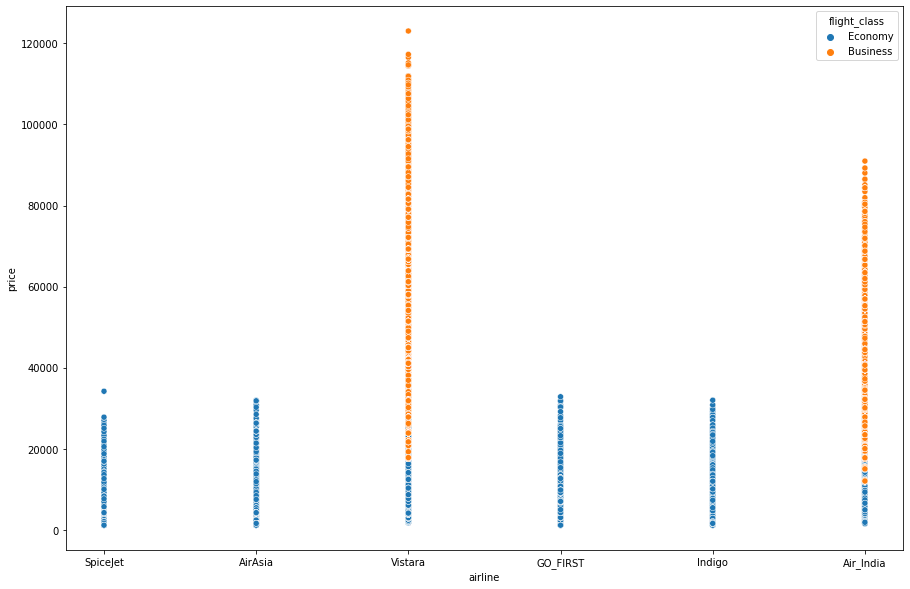

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['airline'], df['price'], hue=df['flight_class'])
plt.show()

##**5) Feature Engineering**

In [313]:
df_select = df.copy() 

In [314]:
df_select.head()

,airline,flight_number,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,price,log_price
0,SpiceJet,SG-8709,Economy,Delhi,Mumbai,Evening,Night,2.17,zero,1,5953,8.691819
1,SpiceJet,SG-8157,Economy,Delhi,Mumbai,Early_Morning,Morning,2.33,zero,1,5953,8.691819
2,AirAsia,I5-764,Economy,Delhi,Mumbai,Early_Morning,Early_Morning,2.17,zero,1,5956,8.692322
3,Vistara,UK-995,Economy,Delhi,Mumbai,Morning,Afternoon,2.25,zero,1,5955,8.692154
4,Vistara,UK-963,Economy,Delhi,Mumbai,Morning,Morning,2.33,zero,1,5955,8.692154


In [315]:
df_select = df_select.drop(['price','flight_number'], axis=1)

In [316]:
df_select

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,log_price
0,SpiceJet,Economy,Delhi,Mumbai,Evening,Night,2.17,zero,1,8.691819
1,SpiceJet,Economy,Delhi,Mumbai,Early_Morning,Morning,2.33,zero,1,8.691819
2,AirAsia,Economy,Delhi,Mumbai,Early_Morning,Early_Morning,2.17,zero,1,8.692322
3,Vistara,Economy,Delhi,Mumbai,Morning,Afternoon,2.25,zero,1,8.692154
4,Vistara,Economy,Delhi,Mumbai,Morning,Morning,2.33,zero,1,8.692154
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Business,Chennai,Hyderabad,Morning,Evening,10.08,one,49,11.145709
300149,Vistara,Business,Chennai,Hyderabad,Afternoon,Night,10.42,one,49,11.252936
300150,Vistara,Business,Chennai,Hyderabad,Early_Morning,Night,13.83,one,49,11.278468
300151,Vistara,Business,Chennai,Hyderabad,Early_Morning,Evening,10.00,one,49,11.309413


###**a) Feature Selection**

In [317]:
# list categorical feature non-ordinal
categorical_feature = ['airline','source_city','destination_city','departure_time',
                       'arrival_time','stops']

# list categorical feature with ordinal values
ordinal_feature = ['flight_class']

# list numerical feature 
numerical_feature = ['flight_duration','days_left']



In [318]:
encoder = TargetEncoder()
df_select[categorical_feature] = encoder.fit_transform(df_select[categorical_feature], df_select['log_price'])

In [319]:
ord_encoder = OrdinalEncoder(categories=[['Economy','Business']])
df_select[ordinal_feature] = ord_encoder.fit_transform(df_select.loc[:,['flight_class']])

In [320]:
df_select

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,log_price
0,8.633474,0.0,9.250665,9.342036,9.328450,9.367847,2.17,8.635780,1,8.691819
1,8.633474,0.0,9.250665,9.342036,9.309078,9.389887,2.33,8.635780,1,8.691819
2,8.167467,0.0,9.250665,9.342036,9.309078,8.984075,2.17,8.635780,1,8.692322
3,9.819725,0.0,9.250665,9.342036,9.396328,9.233444,2.25,8.635780,1,8.692154
4,9.819725,0.0,9.250665,9.342036,9.396328,9.389887,2.33,8.635780,1,8.692154
...,...,...,...,...,...,...,...,...,...,...
300148,9.819725,1.0,9.349923,9.303774,9.396328,9.462325,10.08,9.439595,49,11.145709
300149,9.819725,1.0,9.349923,9.303774,9.205327,9.367847,10.42,9.439595,49,11.252936
300150,9.819725,1.0,9.349923,9.303774,9.309078,9.367847,13.83,9.439595,49,11.278468
300151,9.819725,1.0,9.349923,9.303774,9.309078,9.462325,10.00,9.439595,49,11.309413


###**b) Check Multicollinearity**

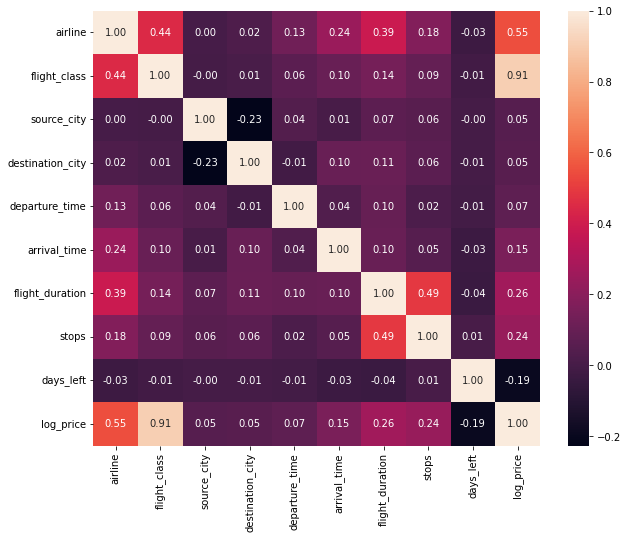

In [321]:
# check correlation all features with heatmap
corr_ = df_select.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_select.corr(), annot=True, fmt='.2f')
plt.show()

> **Observasi:**
> - Dari heatmap diatas dapat dilihat bahwa fitur ```flight_class``` berkorelasi kuat positif dengan target ```log_price``` (coef correlation > 0.8). 
> - Fitur ```flight_class``` sangat baik untuk menjadi predictor target ```log_price``` dan fitur ini tidak akan menyebabkan kebocoran data/ data ada sebelum prediksi (data leakage).

###**d) Train & Test Split**

In [322]:
df_mod = df.copy()

In [323]:
df_mod = df_mod.drop(['price','flight_number'], axis=1)

In [324]:
df_mod

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,log_price
0,SpiceJet,Economy,Delhi,Mumbai,Evening,Night,2.17,zero,1,8.691819
1,SpiceJet,Economy,Delhi,Mumbai,Early_Morning,Morning,2.33,zero,1,8.691819
2,AirAsia,Economy,Delhi,Mumbai,Early_Morning,Early_Morning,2.17,zero,1,8.692322
3,Vistara,Economy,Delhi,Mumbai,Morning,Afternoon,2.25,zero,1,8.692154
4,Vistara,Economy,Delhi,Mumbai,Morning,Morning,2.33,zero,1,8.692154
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Business,Chennai,Hyderabad,Morning,Evening,10.08,one,49,11.145709
300149,Vistara,Business,Chennai,Hyderabad,Afternoon,Night,10.42,one,49,11.252936
300150,Vistara,Business,Chennai,Hyderabad,Early_Morning,Night,13.83,one,49,11.278468
300151,Vistara,Business,Chennai,Hyderabad,Early_Morning,Evening,10.00,one,49,11.309413


In [325]:
df_mod.duplicated().sum()

2213

In [326]:
df_mod = df_mod.drop_duplicates()

In [327]:
df_mod.duplicated().sum()

0

In [328]:
df_mod

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,log_price
0,SpiceJet,Economy,Delhi,Mumbai,Evening,Night,2.17,zero,1,8.691819
1,SpiceJet,Economy,Delhi,Mumbai,Early_Morning,Morning,2.33,zero,1,8.691819
2,AirAsia,Economy,Delhi,Mumbai,Early_Morning,Early_Morning,2.17,zero,1,8.692322
3,Vistara,Economy,Delhi,Mumbai,Morning,Afternoon,2.25,zero,1,8.692154
4,Vistara,Economy,Delhi,Mumbai,Morning,Morning,2.33,zero,1,8.692154
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Business,Chennai,Hyderabad,Morning,Evening,10.08,one,49,11.145709
300149,Vistara,Business,Chennai,Hyderabad,Afternoon,Night,10.42,one,49,11.252936
300150,Vistara,Business,Chennai,Hyderabad,Early_Morning,Night,13.83,one,49,11.278468
300151,Vistara,Business,Chennai,Hyderabad,Early_Morning,Evening,10.00,one,49,11.309413


In [329]:
# define X and y data
X = df_mod.drop(columns='log_price')
y = df_mod['log_price']

#split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [330]:
for x in [X_train, X_test, y_train, y_test]:
    print(x.shape)

(238352, 9)
(59588, 9)
(238352,)
(59588,)


###**c) Pipeline**

In [331]:
# Scaling
robust_scaler = RobustScaler()
numerical_feature = ['flight_duration','days_left']

In [332]:
# Categorical Encoding
cat_enc = ce.TargetEncoder()
categorical_feature = ['airline','source_city','destination_city','departure_time',
                       'arrival_time','stops']

In [333]:
# encode ordinal feature
ordinal_mapping = [
    {'col': 'flight_class',
    'mapping': {'Economy':0, 'Business':1}}]


In [334]:
# Ordinal Categorical encoding
ord_enc = ce.OrdinalEncoder(mapping=ordinal_mapping)
ordinal_feature = ['flight_class']

In [335]:
preprocessor = ColumnTransformer(
      transformers=[('numerical', robust_scaler, numerical_feature),
                    ('categorical', cat_enc, categorical_feature),
                    ('ordinal', ord_enc, ordinal_feature)])

In [336]:
def evaluation_metrics(model, x_test, y_test):
    prediction = model.predict(x_test)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    r2 = r2_score(y_test, prediction)
    print(f'RMSE: {round(RMSE, 3)}')
    print(f'R2_SCORE: {round(r2, 3)}')
    val = dict()
    val['RMSE'] = RMSE
    val['R2'] = r2
    return val

In [337]:
set_config(display='diagram')

###**d) Modeling**

In [338]:
Random_Forest = RandomForestRegressor(random_state=42)
forest_pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('forest',Random_Forest)])
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', RobustScaler(),
                                                  ['flight_duration',
                                                   'days_left']),
                                                 ('categorical',
                                                  TargetEncoder(),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'departure_time',
                                                   'arrival_time', 'stops']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'flight_class',
                                                                           'mapping': {'Business': 1,
                                                                                       'Economy': 0}}]),
                                                  ['flight_class'])])),
                ('forest', RandomForestRegressor(random_state=42))])

In [339]:
XGB = XGBRegressor(random_state=42)
xgb_pipe = Pipeline([
    ('preprocessor',preprocessor),
      ('boost',XGB)])
xgb_pipe.fit(X_train, y_train)

[11:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', RobustScaler(),
                                                  ['flight_duration',
                                                   'days_left']),
                                                 ('categorical',
                                                  TargetEncoder(),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'departure_time',
                                                   'arrival_time', 'stops']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'flight_class',
                                                                           'mapping': {'Business': 1,
                                                                                       'Economy': 0}}]),
                                                  ['flight_class'])])),
                ('boost', XGBRegressor(random_state=42))])

In [340]:
forestAcc = evaluation_metrics(forest_pipe, X_test, y_test)

RMSE: 0.134
R2_SCORE: 0.986


In [341]:
xgbAcc = evaluation_metrics(xgb_pipe, X_test, y_test)

RMSE: 0.242
R2_SCORE: 0.953


###**e) Cross Validation (Benchmark Model)**

In [76]:
#2.Random Forest
r2_forest = cross_val_score(forest_pipe, X_train, y_train, cv=5, scoring='r2')
print('Cross Validation Score: ', r2_forest)

#get the mean of each fold 
print("Average Cross Validation score:", r2_forest.mean() * 100)

Cross Validation Score:  [0.98469024 0.98434853 0.98457607 0.98460604 0.9846543 ]
Average Cross Validation score: 98.45750370034354


In [250]:
#3.Boost
r2_boost = cross_val_score(xgb_pipe, X_train, y_train, cv=5, scoring='r2')
print('Cross Validation Score: ', r2_boost)

#get the mean of each fold 
print("Average Cross Validation score:", r2_boost.mean() * 100)

[08:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation Score:  [0.9541592  0.95300504 0.95343796 0.95365379 0.95301014]
Average Cross Validation score: 95.34532299345312


###**Hyperparameter Tuning**

In [ ]:
rfr_params = {
    'forest__n_estimators': [5, 20, 50, 100], 
    'forest__max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
    'forest__min_samples_split': [2, 6, 10],
    'forest__min_samples_leaf': [1, 3, 4],
    'forest__max_features': ['auto', 'sqrt'],
    'forest__bootstrap': [True, False]
}

Random_Forest2 = RandomForestRegressor(random_state=42)
forest2_pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('percen', SelectPercentile(percentile=50)),
    ('forest',Random_Forest2)])
forest2_pipe.fit(X_train, y_train)

forest_cv = RandomizedSearchCV(forest2_pipe, rfr_params, scoring="r2", n_jobs=-1, verbose=1, cv=5)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_params_)
forest_tuned = forest_cv.best_estimator_.fit(X_train, y_train)
foresttunedAcc = evaluation_metrics(forest_tuned, X_test, y_test)

In [342]:
xgb_params = {'boost__n_estimators': [100, 150, 200],
              'boost__learning_rate': [0.01, 0.05, 0.1], 
              'boost__max_depth': [3, 4, 5, 6, 7],
              'boost__colsample_bytree': [0.6, 0.7, 1],
              'boost__gamma': [0.0, 0.1, 0.2]}

xgb2 = XGBRegressor(random_state=42)
boost2_pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('percen', SelectPercentile(percentile=50)),
    ('boost',xgb2)])
boost2_pipe.fit(X_train, y_train)

boost_cv = RandomizedSearchCV(boost2_pipe, xgb_params, scoring="r2", n_jobs=-1, verbose=1, cv=5)
boost_cv.fit(X_train, y_train)
print(boost_cv.best_params_)
boost_tuned = boost_cv.best_estimator_.fit(X_train, y_train)
boosttunedAcc = evaluation_metrics(boost_tuned, X_test, y_test)

[11:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[11:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'boost__n_estimators': 100, 'boost__max_depth': 6, 'boost__learning_rate': 0.1, 'boost__gamma': 0.1, 'boost__colsample_bytree': 1}
[11:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.4
R2_SCORE: 0.871


##**6) Deployment**

In [343]:
import pickle

In [346]:
pickle.dump(boost_tuned,open('XGBoost_Reg_Tuned.pkl','wb'))

In [256]:
pd.set_option('display.max_columns', 500)
df_mod.head(1)

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,log_price
0,SpiceJet,Economy,Delhi,Mumbai,Evening,Night,2.17,zero,1,8.691819


In [257]:
df_mod['price'] = np.expm1(df_mod['log_price'])

In [259]:
df_mod.drop(['log_price'],axis=1,inplace=True)

In [260]:
df_mod.head(1)

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left,price
0,SpiceJet,Economy,Delhi,Mumbai,Evening,Night,2.17,zero,1,5953.0


###**a) Model Inference**

In [347]:
model = pickle.load(open('XGBoost_Reg_Tuned.pkl','rb'))
model

[12:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', RobustScaler(),
                                                  ['flight_duration',
                                                   'days_left']),
                                                 ('categorical',
                                                  TargetEncoder(),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'departure_time',
                                                   'arrival_time', 'stops']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'flight_class',
                                                                           'mapping': {'Business': 1,
                                                                                       'Economy': 0}}]),
                                                  ['flight_class'])])),
                ('percen', SelectPercentile(percentile=50)),
                ('boost',
                 XGBRegressor(gamma=0.1, max_depth=6, missing=nan,
                              random_state=42))])

In [348]:
df_mod.columns

Index(['airline', 'flight_class', 'source_city', 'destination_city',
       'departure_time', 'arrival_time', 'flight_duration', 'stops',
       'days_left', 'log_price'],
      dtype='object')

In [349]:
new_data = [{'airline': 'Vistara',
             'flight_class': 'Business',
             'source_city': 'Mumbai',
             'destination_city':'Delhi',
             'departure_time': 'Morning',
             'arrival_time': 'Morning',
             'flight_duration': 2.17,
             'stops': 'one',
             'days_left': 5 }
             ]

data_testing1= pd.DataFrame(new_data,index=[1])
data_testing1

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left
1,Vistara,Business,Mumbai,Delhi,Morning,Morning,2.17,one,5


In [350]:
pred = model.predict(data_testing1)

In [351]:
print("harga tiket pesawat yang relevan adalah ₹",(np.expm1(pred)[0]).round(2))

harga tiket pesawat yang relevan adalah ₹ 45245.44


In [352]:
new_data2 = [{'airline': 'Air_India',
             'flight_class': 'Economy',
             'source_city': 'Delhi',
             'destination_city':'Mumbai',
             'departure_time': 'Morning',
             'arrival_time': 'Morning',
             'flight_duration': 2.17,
             'stops': 'zero',
             'days_left': 1 }
             ]

data_testing2= pd.DataFrame(new_data2,index=[1])
data_testing2

,airline,flight_class,source_city,destination_city,departure_time,arrival_time,flight_duration,stops,days_left
1,Air_India,Economy,Delhi,Mumbai,Morning,Morning,2.17,zero,1


In [353]:
pred = model.predict(data_testing2)

In [354]:
print("harga tiket pesawat yang relevan adalah ₹",(np.expm1(pred)[0]).round(2))

harga tiket pesawat yang relevan adalah ₹ 5915.36


In [355]:
df_mod.to_csv('final_flight_dataset.csv', index=False)

##**7) Conclusion**